In [2]:
import seaborn as sns

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt



# Load the Titanic dataset

titanic_data = sns.load_dataset('titanic')



# Preview the first few rows

titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
print("Shape of the dataset:", titanic_data.shape)

print("\nColumns in the dataset:\n", titanic_data.columns)



# Check for missing values

print("\nMissing values in each column:\n", titanic_data.isnull().sum())



# Data types and summary statistics

print("\nData types:\n", titanic_data.dtypes)

print("\nSummary Statistics:\n", titanic_data.describe(include='all'))

Shape of the dataset: (891, 15)

Columns in the dataset:
 Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

Missing values in each column:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Data types:
 survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

Summary Statistics:
           su

In [6]:
# prompt: check missing values



print("\nMissing values in each column:\n", titanic_data.isnull().sum())

print("\nPercentage of missing values in each column:\n", (titanic_data.isnull().sum()/len(titanic_data))*100)


Missing values in each column:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Percentage of missing values in each column:
 survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


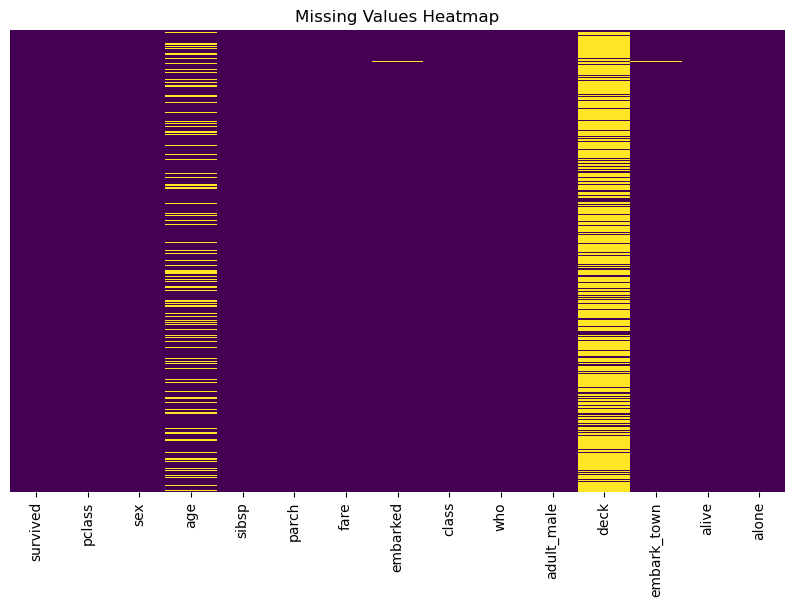

In [4]:
# Create the heatmap

plt.figure(figsize=(10, 6))

sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis', yticklabels=False)

plt.title('Missing Values Heatmap')

plt.show()


# finding the missing values 

In [7]:
# Import necessary libraries

from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer

from sklearn.ensemble import RandomForestRegressor



# Create a copy to avoid modifying the original DataFrame

titanic_data_filled = titanic_data.copy()



# Separate numerical and categorical columns

numerical_cols = titanic_data_filled.select_dtypes(include=['number']).columns
categorical_cols = titanic_data_filled.select_dtypes(exclude=['number']).columns



# Use IterativeImputer for numerical features

imputer_num = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)

titanic_data_filled[numerical_cols] = imputer_num.fit_transform(titanic_data_filled[numerical_cols])



# Fill categorical features with the mode (most frequent value)

for col in categorical_cols:

    titanic_data_filled[col] = titanic_data_filled[col].fillna(titanic_data_filled[col].mode()[0])
# Verify if there are any missing values left

print("\nMissing values after imputation:\n", titanic_data_filled.isnull().sum())





Missing values after imputation:
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


# Univariate Analysis


Survival Count:
 survived
0.0    549
1.0    342
Name: count, dtype: int64


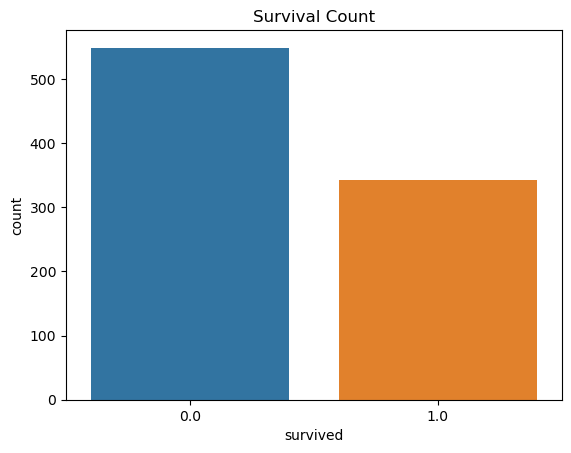


Age Statistics:
 count    891.000000
mean      29.642036
std       13.759679
min        0.420000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: age, dtype: float64


C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


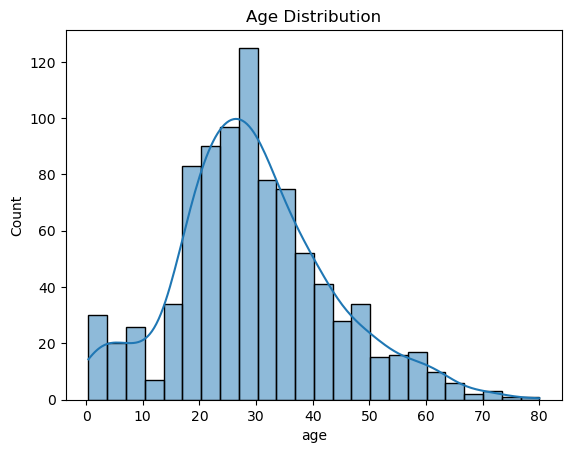


Sex Distribution:
 sex
male      577
female    314
Name: count, dtype: int64

Pclass Distribution:
 pclass
3.0    491
1.0    216
2.0    184
Name: count, dtype: int64


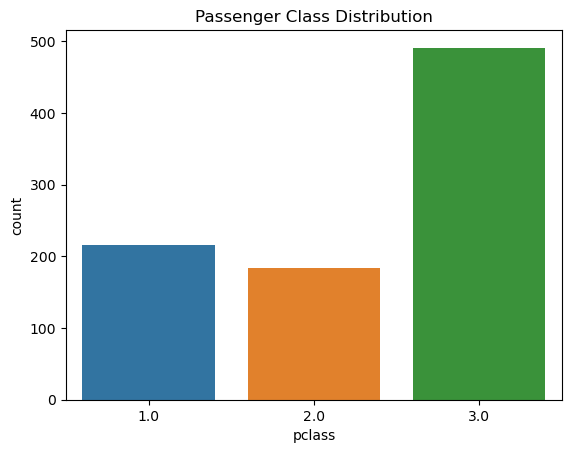

In [10]:
# Analyze 'survived'

print("\nSurvival Count:\n", titanic_data_filled['survived'].value_counts())

sns.countplot(x='survived', data=titanic_data_filled)

plt.title('Survival Count')

plt.show()
plt.show()



# Analyze 'age'

print("\nAge Statistics:\n", titanic_data_filled['age'].describe())

sns.histplot(x='age', data=titanic_data_filled, kde=True)

plt.title('Age Distribution')

plt.show()



# Analyze 'sex'

print("\nSex Distribution:\n", titanic_data_filled['sex'].value_counts())


# Analyze 'pclass'

print("\nPclass Distribution:\n", titanic_data_filled['pclass'].value_counts())

sns.countplot(x='pclass', data=titanic_data_filled)

plt.title('Passenger Class Distribution')
plt.show()


# Insights from analysis

In [20]:

#Findings
#Gender: Females had a higher survival rate compared to males.

#Class: Passengers in 1st class had better chances of survival.

#Age: Younger passengers (children) were more likely to survive.

# survival analysis

AttributeError: 'numpy.int64' object has no attribute 'startswith'

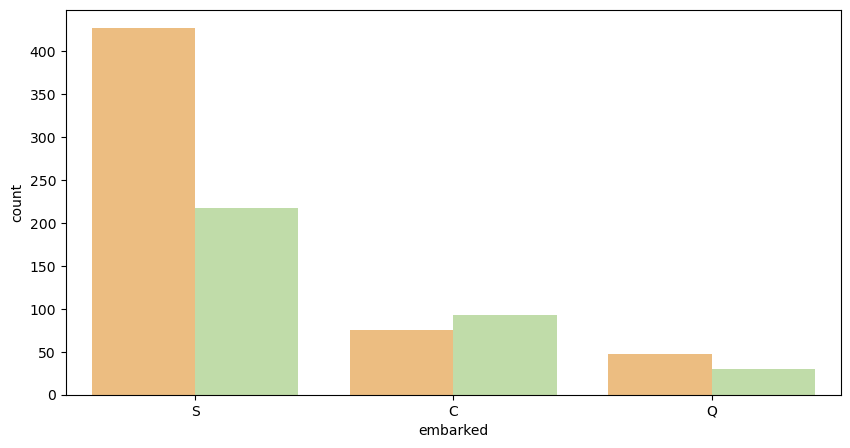

In [21]:
# Survival Based on Embarkation Point

plt.figure(figsize=(10, 5))

sns.countplot(x='embarked', hue='survived', data=titanic_data, palette='Spectral')

plt.title('Survival Based on Embarkation Point')

plt.xlabel('Embarkation Point')

plt.ylabel('Count')

plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()


# Survival Based on Fare

plt.figure(figsize=(10, 6))

sns.histplot(titanic_data, x='fare', hue='survived', bins=20, kde=True, palette='viridis')

plt.title('Fare Distribution by Survival')

plt.xlabel('Fare')

plt.ylabel('Count')

plt.show()


# Family Size Analysis

titanic_data['family_size'] = titanic_data['sibsp'] + titanic_data['parch']



plt.figure(figsize=(10, 6))

sns.countplot(x='family_size', hue='survived', data=titanic_data, palette='cubehelix')

plt.title('Survival Based on Family Size')

plt.xlabel('Family Size')

plt.ylabel('Count')

plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()

# Advanced Visualization(Heatmap)

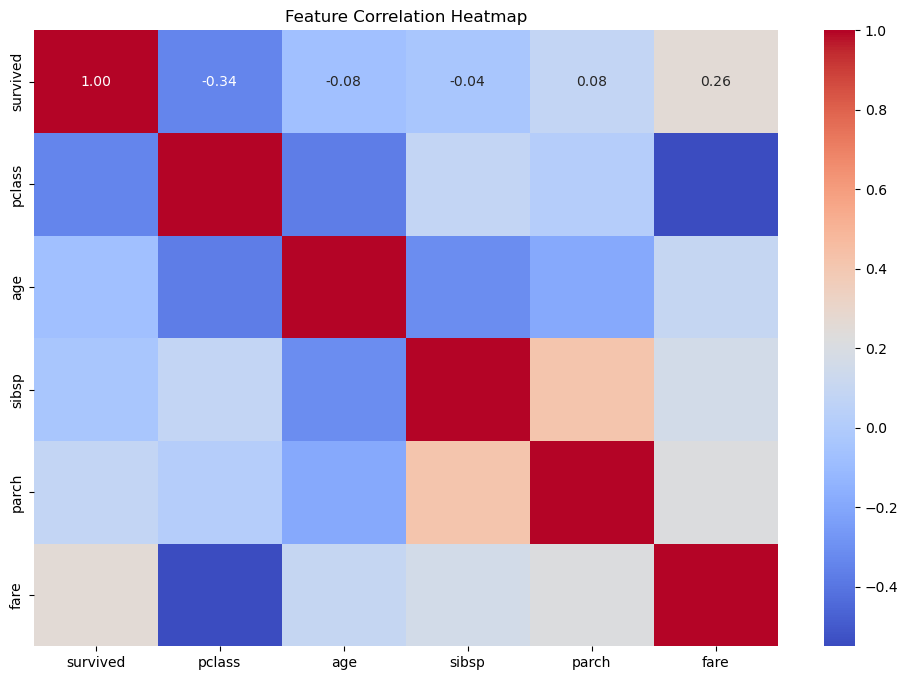

In [22]:
# Correlation heatmap

plt.figure(figsize=(12, 8))

# Select only numeric features for correlation calculation

numeric_features = titanic_data.select_dtypes(include=np.number)

sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Feature Correlation Heatmap')

plt.show()